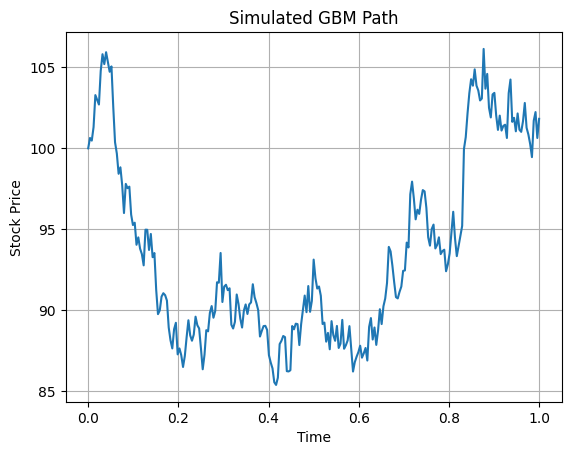

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / n
    t = np.linspace(0, T, n + 1)
    Z = np.random.normal(0, 1, n)
    W = np.cumsum(np.sqrt(dt) * Z)  # Brownian motion
    W = np.insert(W, 0, 0.0)
    
    S = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * W)
    
    return t, S

# Example parameters
S0 = 100
mu = 0.05
sigma = 0.2
T = 1.0
n = 252

t, S = simulate_gbm(S0, mu, sigma, T, n, seed=42)

plt.plot(t, S)
plt.title('Simulated GBM Path')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


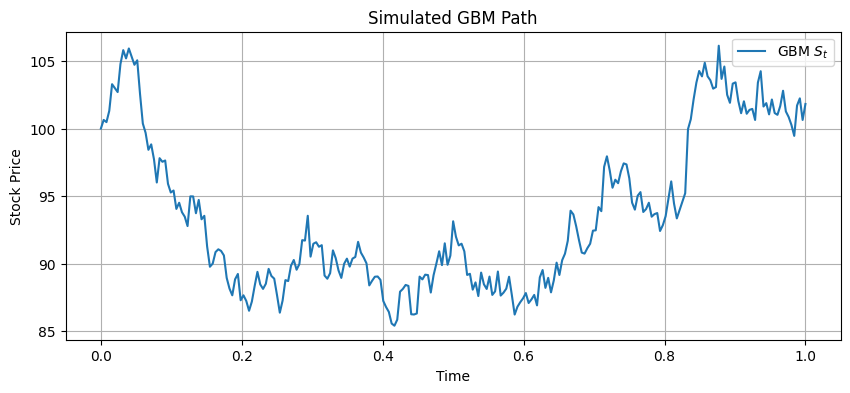

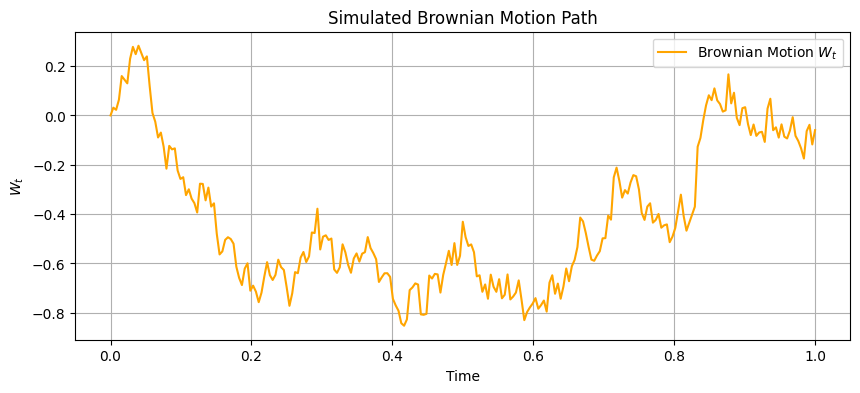

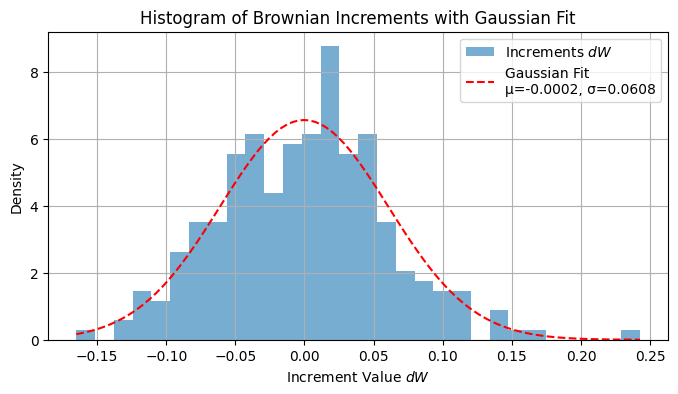

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulate_brownian_motion(T, n, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    dt = T / n
    t = np.linspace(0, T, n + 1)
    Z = np.random.normal(0, 1, n)
    dW = np.sqrt(dt) * Z
    W = np.insert(np.cumsum(dW), 0, 0.0)  # W_0 = 0
    return t, W, dW

def simulate_gbm(S0, mu, sigma, T, n, seed=None):
    t, W, _ = simulate_brownian_motion(T, n, seed)
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S, W

# Parameters
S0 = 100
mu = 0.05
sigma = 0.2
T = 1.0
n = 252
seed = 42

# Simulations
t, S, W = simulate_gbm(S0, mu, sigma, T, n, seed)
_, W_path, dW = simulate_brownian_motion(T, n, seed)

# Plot 1: GBM Path
plt.figure(figsize=(10, 4))
plt.plot(t, S, label='GBM $S_t$')
plt.title('Simulated GBM Path')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Brownian Motion Path
plt.figure(figsize=(10, 4))
plt.plot(t, W_path, label='Brownian Motion $W_t$', color='orange')
plt.title('Simulated Brownian Motion Path')
plt.xlabel('Time')
plt.ylabel('$W_t$')
plt.grid(True)
plt.legend()
plt.show()

# Plot 3: Histogram of Increments with Gaussian Fit
plt.figure(figsize=(8, 4))
plt.hist(dW, bins=30, density=True, alpha=0.6, label='Increments $dW$')

# Fit and overlay normal PDF
mu_fit, std_fit = norm.fit(dW)
x_vals = np.linspace(min(dW), max(dW), 100)
plt.plot(x_vals, norm.pdf(x_vals, mu_fit, std_fit), 'r--', label=f'Gaussian Fit\nμ={mu_fit:.4f}, σ={std_fit:.4f}')

plt.title('Histogram of Brownian Increments with Gaussian Fit')
plt.xlabel('Increment Value $dW$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


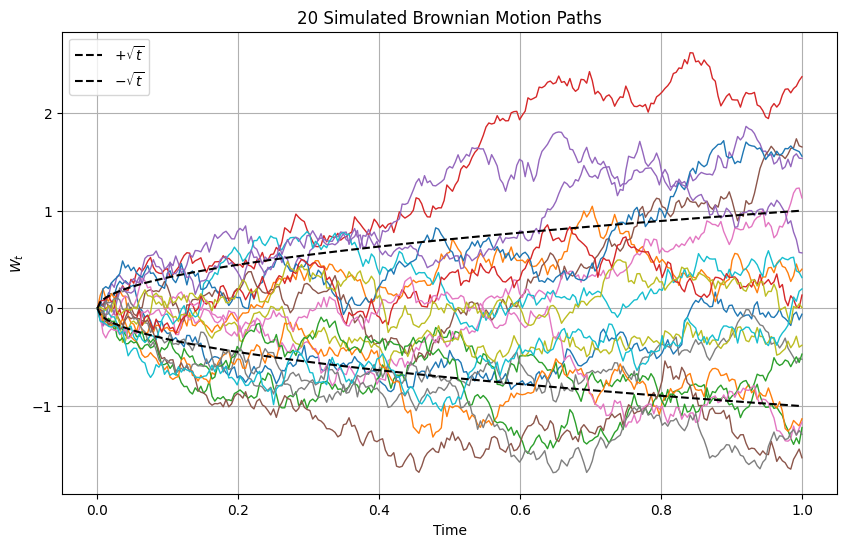

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_multiple_brownian_paths(T, n, M, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    dt = T / n
    t = np.linspace(0, T, n + 1)
    dW = np.random.normal(0, np.sqrt(dt), size=(M, n))  # shape: (M paths, n steps)
    W = np.concatenate((np.zeros((M, 1)), np.cumsum(dW, axis=1)), axis=1)
    
    return t, W

# Parameters
T = 1.0       # time horizon (e.g., 1 year)
n = 252       # number of time steps
M = 20        # number of Brownian paths
seed = 42

# Simulate
t, W = simulate_multiple_brownian_paths(T, n, M, seed)

# Plot
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, W[i], lw=1)

# Optional: overlay theoretical std dev envelope ±√t
std_envelope = np.sqrt(t)
plt.plot(t, +std_envelope, 'k--', lw=1.5, label=r'$+\sqrt{t}$')
plt.plot(t, -std_envelope, 'k--', lw=1.5, label=r'$-\sqrt{t}$')

plt.title(f"{M} Simulated Brownian Motion Paths")
plt.xlabel("Time")
plt.ylabel("$W_t$")
plt.grid(True)
plt.legend()
plt.show()


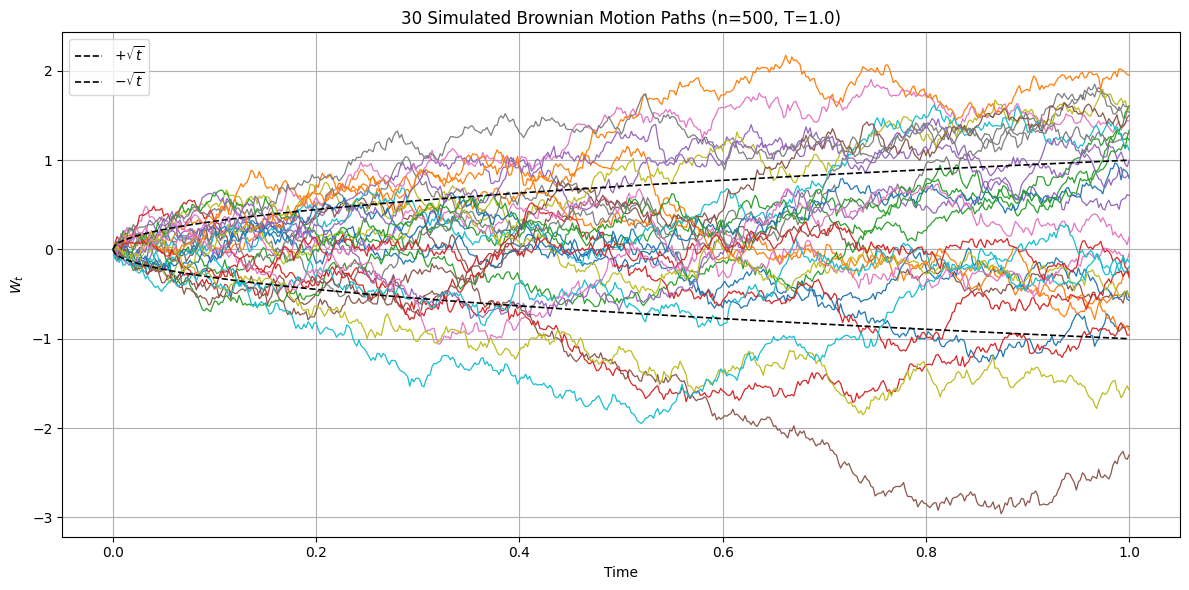

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_multiple_brownian_paths(T=1.0, n=100, M=10, seed=None):
    """
    Simulate M Brownian motion paths with n time steps over time horizon T.

    Parameters:
    - T: Total time (e.g., 1.0 for 1 year)
    - n: Number of time steps (resolution)
    - M: Number of Brownian motion paths
    - seed: Random seed for reproducibility

    Returns:
    - t: time points (shape: n+1,)
    - W: Brownian paths (shape: M, n+1)
    """
    if seed is not None:
        np.random.seed(seed)

    dt = T / n
    t = np.linspace(0, T, n + 1)
    dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=(M, n))
    W = np.concatenate([np.zeros((M, 1)), np.cumsum(dW, axis=1)], axis=1)
    
    return t, W

# Example usage
T = 1.0      # total time
n = 500      # number of observations (finer resolution)
M = 30       # number of paths
seed = 123   # reproducibility

t, W = simulate_multiple_brownian_paths(T=T, n=n, M=M, seed=seed)

# Plot
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(t, W[i], lw=0.9)

plt.plot(t, np.sqrt(t), 'k--', lw=1.2, label=r'$+\sqrt{t}$')
plt.plot(t, -np.sqrt(t), 'k--', lw=1.2, label=r'$-\sqrt{t}$')

plt.title(f'{M} Simulated Brownian Motion Paths (n={n}, T={T})')
plt.xlabel('Time')
plt.ylabel('$W_t$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Brownian Motion Simulation and Gaussian Fit

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set Parameters
# T = 1.0           # Total time
# n = 100           # Number of steps
# t = np.linspace(0, T, n + 1)  # Time grid: t0 < t1 < ... < tn
# dt = np.diff(t)   # Step sizes
# _______________________________****************************_______________________________> Below these is a method similar to what the lec used
T = 1.0
n_steps = 100
n_paths = 500
dt = T / n_steps
t_grid = np.linspace(0, T, n_steps + 1)



In [28]:
# Initialize Brownian motion array
# W = np.zeros(n + 1)  # Set W(0) = 0

# Step through time and simulate Brownian increments
# for k in range(1, n + 1):
#     Zk = np.random.normal(0, 1)
#     W[k] = W[k - 1] + np.sqrt(dt[k - 1]) * Zk
# _______________________________****************************_______________________________    
# Simulating paths | Each path starts at W_0 = 0
W_paths = np.zeros((n_paths, n_steps + 1))

for j in range(n_paths):
    Z = np.random.normal(0, 1, n_steps)
    dW = np.sqrt(dt) * Z
    W_paths[j, 1:] = np.cumsum(dW)



In [29]:
from scipy.interpolate import interp1d

# Create a linear interpolator: W(t) between grid points
# W_interp = interp1d(t, W, kind='linear')
# _______________________________****************************_______________________________
# Extracting W_T values and fitting the Gaussian
W_T_values = W_paths[:, -1]  # Values at final time T = 1

# Estimate mean and std for Gaussian fit
mu_hat = np.mean(W_T_values)
sigma_hat = np.std(W_T_values)



In [30]:
# t_query = 0.37
# Wt_query = W_interp(t_query)
# print(f"W({t_query}) ≈ {Wt_query:.4f}")


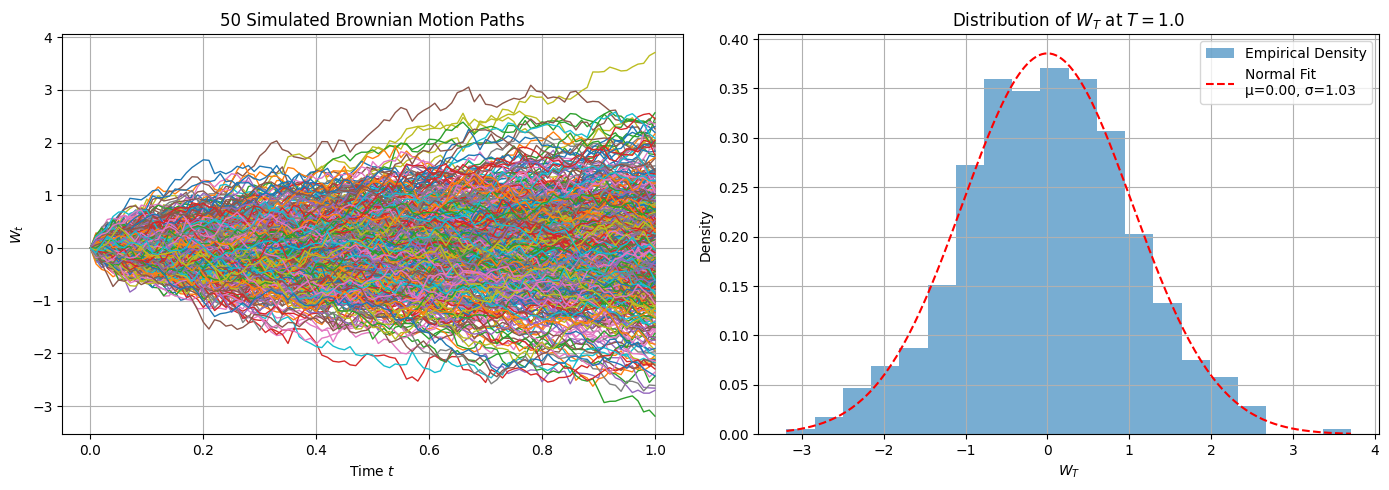

In [31]:
# plt.figure(figsize=(10, 4))
# plt.plot(t, W, label="Brownian Path")
# plt.title("Simulated Brownian Motion $W_t$")
# plt.xlabel("Time $t$")
# plt.ylabel("$W_t$")
# plt.grid(True)
# plt.legend()
# plt.show()
# _______________________________****************************_______________________________
# Side by side plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: Brownian Paths ---
for j in range(n_paths):
    axs[0].plot(t_grid, W_paths[j], linewidth=1)

axs[0].set_title('50 Simulated Brownian Motion Paths')
axs[0].set_xlabel('Time $t$')
axs[0].set_ylabel('$W_t$')
axs[0].grid(True)

# --- Right: Histogram + Gaussian Fit ---
x_vals = np.linspace(min(W_T_values), max(W_T_values), 200)
pdf_vals = norm.pdf(x_vals, loc=mu_hat, scale=sigma_hat)

axs[1].hist(W_T_values, bins=20, density=True, alpha=0.6, label='Empirical Density')
axs[1].plot(x_vals, pdf_vals, 'r--', label=f'Normal Fit\nμ={mu_hat:.2f}, σ={sigma_hat:.2f}')
axs[1].set_title('Distribution of $W_T$ at $T=1.0$')
axs[1].set_xlabel('$W_T$')
axs[1].set_ylabel('Density')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## CIR vs Vasicek Simulation

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# === Model Parameters ===
T = 10             # Time horizon in years
N = 500            # Number of steps
dt = T / N
t_grid = np.linspace(0, T, N + 1)

kappa = 0.6        # Speed of mean reversion
theta = 0.05       # Long-term mean rate
sigma = 0.1        # Volatility
r0 = 0.03          # Initial rate

# === Brownian motion increments ===
Z = np.random.normal(0, 1, N)
dW = np.sqrt(dt) * Z

# === Initialize rate arrays ===
r_vas = np.zeros(N + 1)
r_cir = np.zeros(N + 1)

r_vas[0] = r0
r_cir[0] = r0

# === Simulate Vasicek and CIR ===
for i in range(1, N + 1):
    # Vasicek
    r_vas[i] = r_vas[i-1] + kappa * (theta - r_vas[i-1]) * dt + sigma * dW[i-1]
    
    # CIR
    sqrt_r = np.sqrt(max(r_cir[i-1], 0))  # prevent sqrt of negative
    r_cir[i] = r_cir[i-1] + kappa * (theta - r_cir[i-1]) * dt + sigma * sqrt_r * dW[i-1]


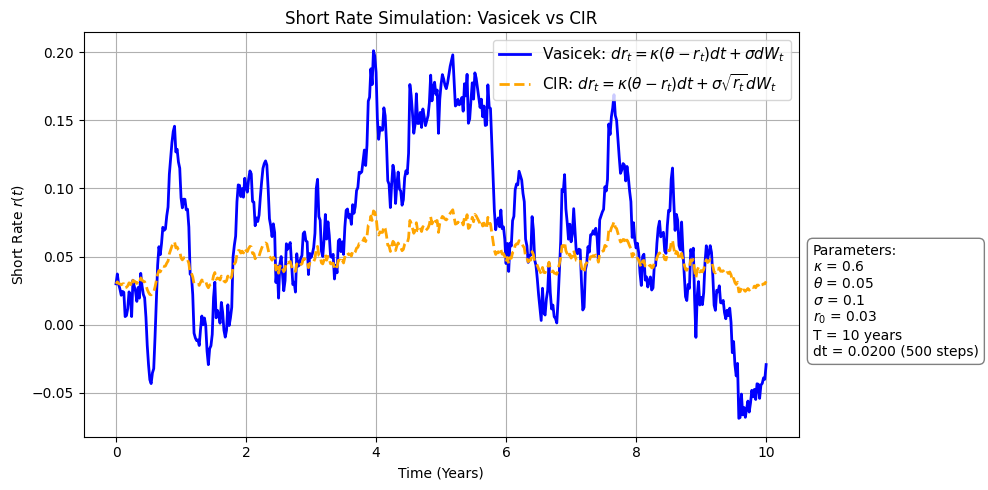

In [37]:
# Plot of Short rate vs Time
plt.figure(figsize=(10, 5))

# Plot both processes
plt.plot(t_grid, r_vas, label=r'Vasicek: $dr_t = \kappa(\theta - r_t)dt + \sigma dW_t$', color='blue', linewidth=2)
plt.plot(t_grid, r_cir, label=r'CIR: $dr_t = \kappa(\theta - r_t)dt + \sigma \sqrt{r_t} dW_t$', color='orange', linestyle='--', linewidth=2)

# Parameter key text
param_text = (
    f"Parameters:\n"
    r"$\kappa$ = " + f"{kappa}\n"
    r"$\theta$ = " + f"{theta}\n"
    r"$\sigma$ = " + f"{sigma}\n"
    r"$r_0$ = " + f"{r0}\n"
    f"T = {T} years\n"
    f"dt = {dt:.4f} ({N} steps)"
)

# Add textbox to the plot
plt.text(1.02, 0.2, param_text, fontsize=10, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))

# Final touches
plt.title('Short Rate Simulation: Vasicek vs CIR')
plt.xlabel('Time (Years)')
plt.ylabel('Short Rate $r(t)$')
plt.grid(True)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()




## Black-Scholes Call Price vs. Underlying Price

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# # === Parameters ===
# K = 100        # Strike price
# r = 0.05       # Risk-free rate
# sigma = 0.2    # Volatility
# T = 1.0        # Time to maturity (in years)
# t = 0.0        # Current time

# # === Underlying asset price range ===
# x_vals = np.linspace(50, 150, 200)

# # === Black-Scholes call price computation ===
# def black_scholes_call(x, K, r, sigma, T, t):
#     tau = T - t
#     d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
#     d2 = d1 - sigma * np.sqrt(tau)
#     return x * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

# call_prices = black_scholes_call(x_vals, K, r, sigma, T, t)

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# Parameters
K = 100          # Strike price
r = 0.05         # Risk-free rate
sigma = 0.2      # Volatility
t = 0.0          # Current time

# Maturities to compare
T1 = 0.5         # 6 months
T2 = 1.0         # 1 year

# Underlying asset price range
x_vals = np.linspace(50, 150, 300)

# Black-Scholes formula
def black_scholes_call(x, K, r, sigma, T, t):
    tau = T - t
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return x * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

# Compute call prices and payoff
call_T1 = black_scholes_call(x_vals, K, r, sigma, T1, t)
call_T2 = black_scholes_call(x_vals, K, r, sigma, T2, t)
payoff = np.maximum(x_vals - K, 0)



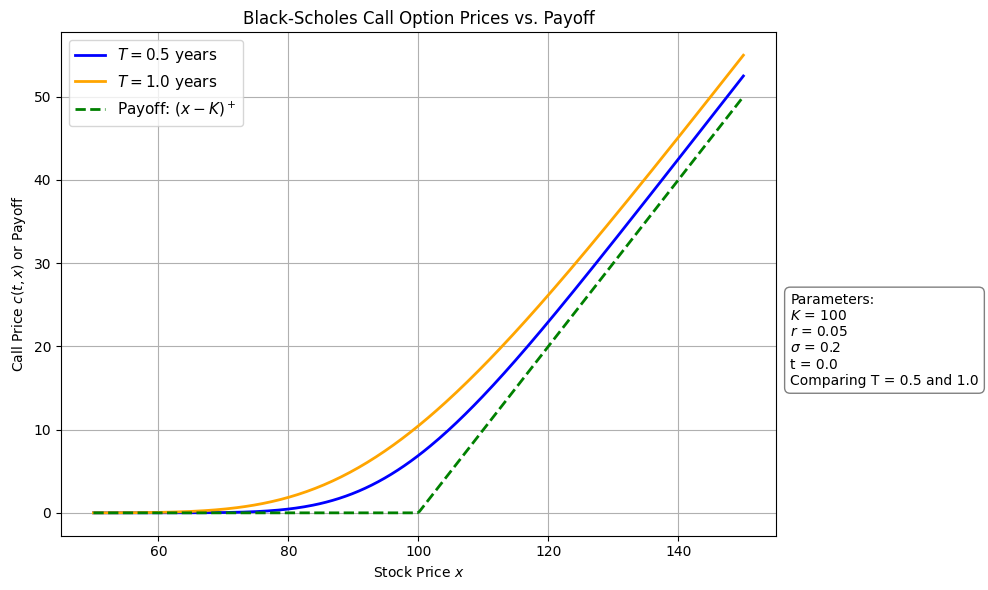

In [42]:
# # Plot the Call Option Price with Equation and Parameter Key
# plt.figure(figsize=(10, 6))

# # Plot the call price
# plt.plot(x_vals, call_prices, label=r'$c(t,x) = x N(d_1) - K e^{-r(T - t)} N(d_2)$', linewidth=2, color='blue')

# # Axis labels and title
# plt.title('Black-Scholes Call Option Price vs. Underlying Price')
# plt.xlabel('Stock Price $x$')
# plt.ylabel('Call Option Price $c(t,x)$')
# plt.grid(True)

# # Add parameter key
# param_text = (
#     f"Parameters:\n"
#     r"$K$ = " + f"{K}\n"
#     r"$r$ = " + f"{r}\n"
#     r"$\sigma$ = " + f"{sigma}\n"
#     f"T = {T}\n"
#     f"t = {t}"
# )

# plt.text(1.02, 0.4, param_text, fontsize=10, transform=plt.gca().transAxes,
#          bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))

# # Legend
# plt.legend(fontsize=12, loc='upper left')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 6))

# Plot BS prices and payoff
plt.plot(x_vals, call_T1, label=r'$T = 0.5$ years', linewidth=2, color='blue')
plt.plot(x_vals, call_T2, label=r'$T = 1.0$ years', linewidth=2, color='orange')
plt.plot(x_vals, payoff, label=r'Payoff: $(x - K)^+$', linewidth=2, color='green', linestyle='--')

# Labels and formatting
plt.title('Black-Scholes Call Option Prices vs. Payoff')
plt.xlabel('Stock Price $x$')
plt.ylabel('Call Price $c(t, x)$ or Payoff')
plt.grid(True)

# Parameter box
param_text = (
    f"Parameters:\n"
    r"$K$ = " + f"{K}\n"
    r"$r$ = " + f"{r}\n"
    r"$\sigma$ = " + f"{sigma}\n"
    f"t = {t}\n"
    "Comparing T = 0.5 and 1.0"
)

plt.text(1.02, 0.3, param_text, fontsize=10, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))

plt.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()



> **Set Up 2D Grids for Stock Price and Time to Maturity**

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Grid ranges
x_vals = np.linspace(50, 150, 100)          # Stock price
T_vals = np.linspace(0.01, 1.0, 100)        # Time to maturity (avoid 0 to prevent division by zero)

# Create meshgrid
X, T = np.meshgrid(x_vals, T_vals)

# Parameters
K = 100
r = 0.05
sigma = 0.2


In [44]:
# Vectorized Black-Scholes Call Price
def bs_call_surface(X, T, K, r, sigma):
    d1 = (np.log(X / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return X * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


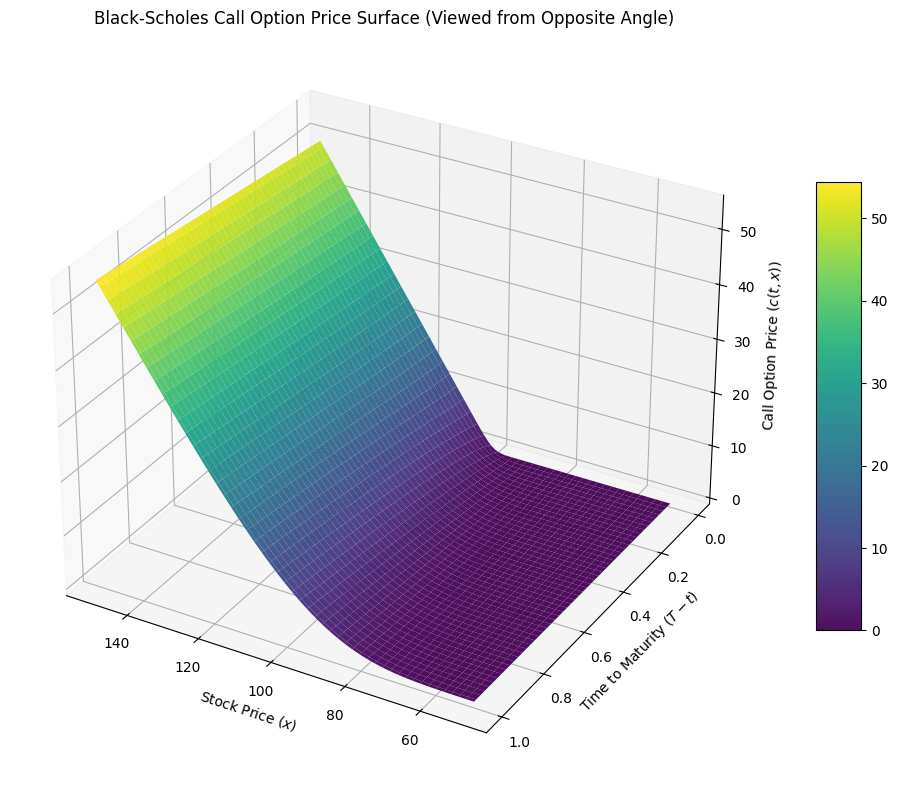

In [50]:
# # Evaluate and Plot 3D Surface
# # Evaluate BS call prices
# C = bs_call_surface(X, T, K, r, sigma)

# # Plot 3D surface
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(X, T, C, cmap=cm.viridis, edgecolor='none', alpha=0.95)

# # Labels and title
# ax.set_title('Black-Scholes Call Option Price Surface')
# ax.set_xlabel('Stock Price $x$')
# ax.set_ylabel('Time to Maturity $T - t$')
# ax.set_zlabel('Call Option Price $c(t,x)$')

# # Color bar
# fig.colorbar(surf, shrink=0.6, aspect=10)
# plt.tight_layout()
# plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, T, C, cmap=cm.viridis, edgecolor='none', alpha=0.95)

# Axes and labels
ax.set_title('Black-Scholes Call Option Price Surface (Viewed from Opposite Angle)')
ax.set_xlabel('Stock Price ($x$)')
ax.set_ylabel('Time to Maturity ($T - t$)')
ax.set_zlabel('Call Option Price ($c(t,x)$)')

# Rotate view: elev = vertical, azim = rotation around z-axis
ax.view_init(elev=30, azim=120)

# Color bar
fig.colorbar(surf, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()



> **3D Surface Plot: $ c(x,σ) for Fixed 𝑇 $**

In [51]:
# Create Grids for Stock Price and Volatility
# Grid ranges
x_vals = np.linspace(50, 150, 100)          # Stock price
sigma_vals = np.linspace(0.01, 0.6, 100)    # Volatility from 1% to 60%

# Create meshgrid
X, Sigma = np.meshgrid(x_vals, sigma_vals)

# Fixed parameters
K = 100
r = 0.05
T = 1.0


In [52]:
# Vectorized Black-Scholes Function for Volatility Surface
def bs_call_vol_surface(X, Sigma, K, r, T):
    d1 = (np.log(X / K) + (r + 0.5 * Sigma**2) * T) / (Sigma * np.sqrt(T))
    d2 = d1 - Sigma * np.sqrt(T)
    return X * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


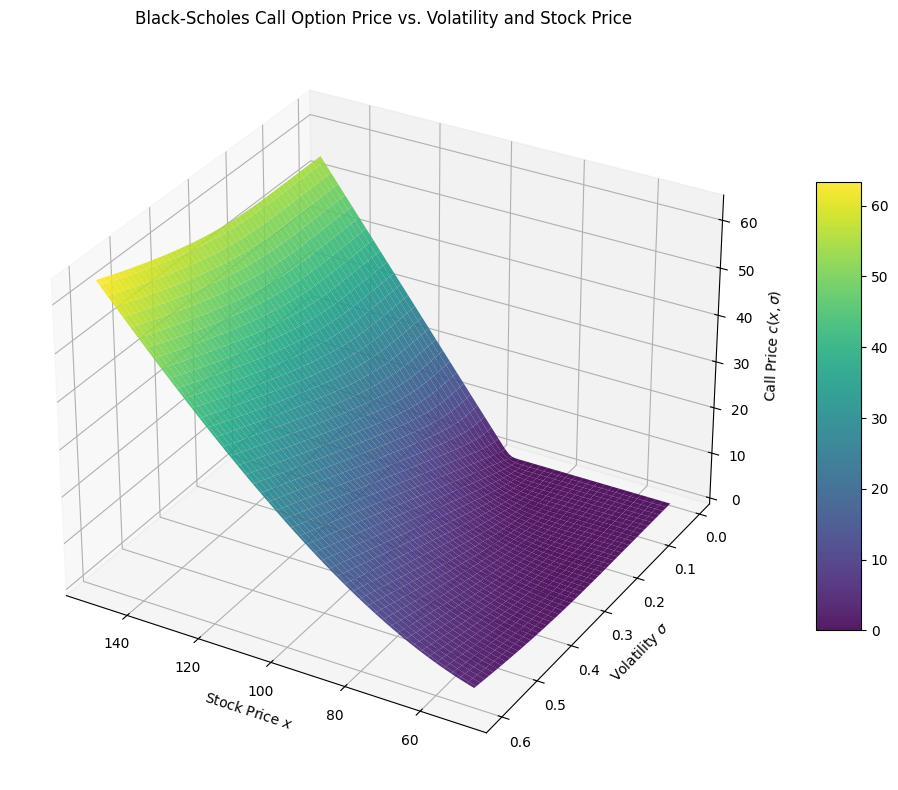

In [55]:
# Evaluate and Plot
# Evaluate call prices across (x, sigma) grid
C = bs_call_vol_surface(X, Sigma, K, r, T)

# 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Sigma, C, cmap=cm.viridis, edgecolor='none', alpha=0.9)

# View angle and labels
ax.view_init(elev=30, azim=120)
ax.set_title('Black-Scholes Call Option Price vs. Volatility and Stock Price')
ax.set_xlabel('Stock Price $x$')
ax.set_ylabel('Volatility $\\sigma$')
ax.set_zlabel('Call Price $c(x, \\sigma)$')

fig.colorbar(surf, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()


## Black-Scholes Greeks for Call Options

In [56]:
# Parameters for the Plots
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Common parameters
K = 100          # Strike price
r = 0.05         # Risk-free rate
sigma = 0.2      # Volatility
T = 1.0          # Time to maturity
t = 0.0          # Current time
tau = T - t      # Time to expiry

# Underlying stock price range
S = np.linspace(50, 150, 500)

# Intermediate terms
def d1_d2(S, K, r, sigma, tau):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return d1, d2


1. Delta $ Δ = ∂𝐶 / ∂𝑆 = 𝑁(𝑑1) $

In [57]:
# Delta
d1, d2 = d1_d2(S, K, r, sigma, tau)
delta = norm.cdf(d1)


2. Gamma $ Γ=∂^2𝐶 / ∂𝑆^2 = 𝑁′(𝑑1) / 𝑆𝜎 \sqrt𝜏 ​$


In [58]:
gamma = norm.pdf(d1) / (S * sigma * np.sqrt(tau))


3. Vega $ ν= ∂σ / ∂C ​ =Sϕ(d1​) \sqrt τ $
​


In [59]:
vega = S * norm.pdf(d1) * np.sqrt(tau)


4. Theta $ Θ= ∂C / ∂t = - ​SσN′(d 1) / 2 \sqrt τ ​−rKe ^{−rτ} N(d2) $

In [60]:
theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(tau)) - r * K * np.exp(-r * tau) * norm.cdf(d2)


5. Rho $ ρ= ∂C​ / ∂r = K(T−t)e^{−r(T−t)} N(d2) $

In [61]:
rho = K * tau * np.exp(-r * tau) * norm.cdf(d2)


> **Plotting All Greeks**

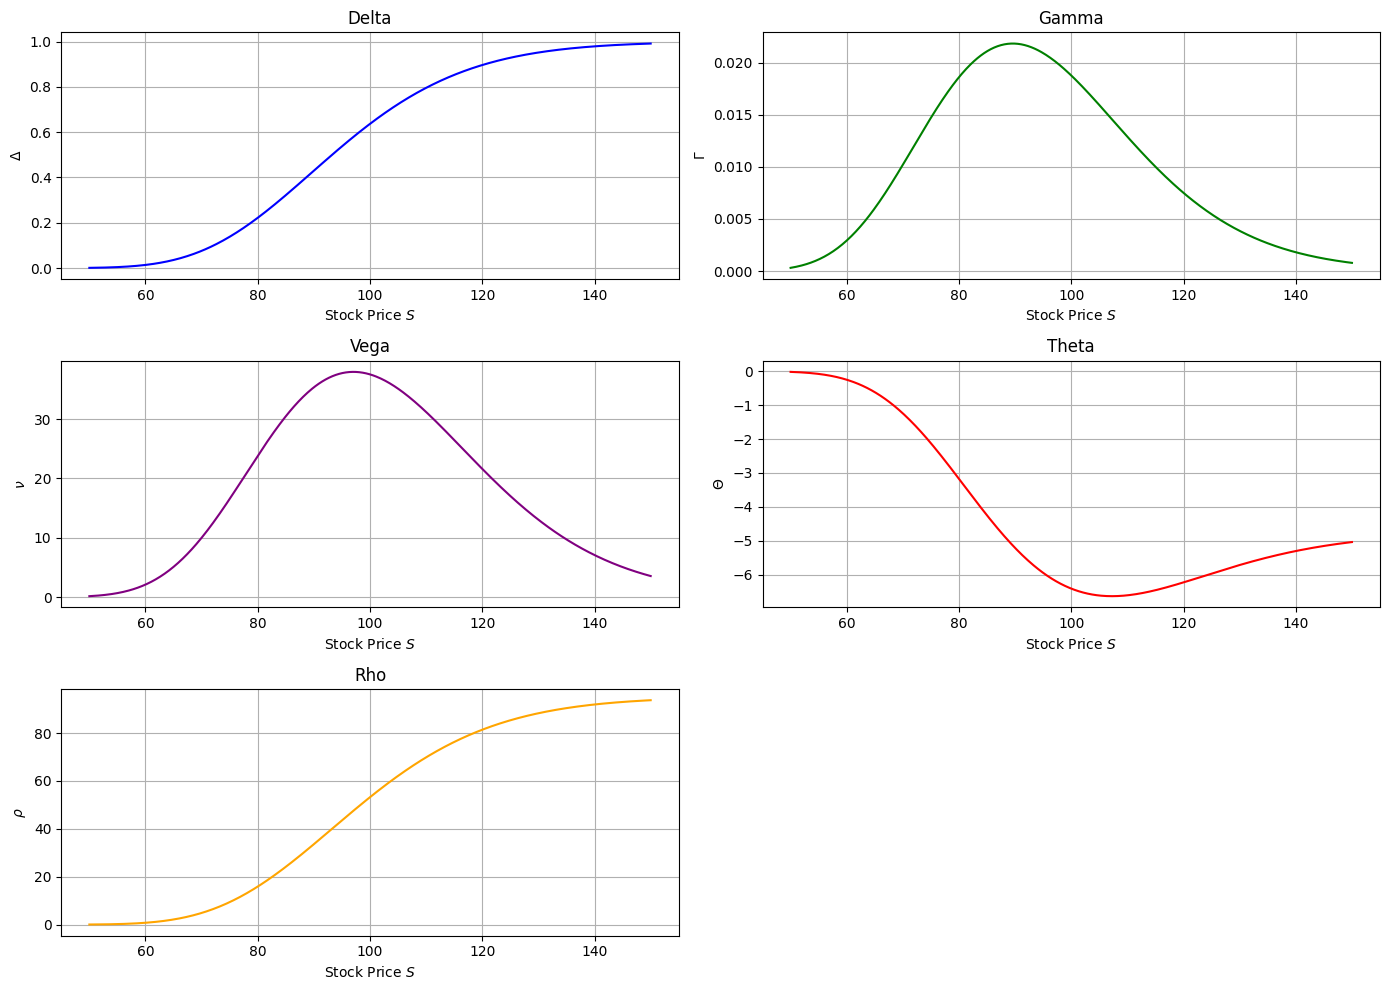

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.ravel()

# Plot Delta
axs[0].plot(S, delta, color='blue')
axs[0].set_title("Delta")
axs[0].set_ylabel(r"$\Delta$")
axs[0].grid(True)

# Plot Gamma
axs[1].plot(S, gamma, color='green')
axs[1].set_title("Gamma")
axs[1].set_ylabel(r"$\Gamma$")
axs[1].grid(True)

# Plot Vega
axs[2].plot(S, vega, color='purple')
axs[2].set_title("Vega")
axs[2].set_ylabel(r"$\nu$")
axs[2].grid(True)

# Plot Theta
axs[3].plot(S, theta, color='red')
axs[3].set_title("Theta")
axs[3].set_ylabel(r"$\Theta$")
axs[3].grid(True)

# Plot Rho
axs[4].plot(S, rho, color='orange')
axs[4].set_title("Rho")
axs[4].set_ylabel(r"$\rho$")
axs[4].grid(True)

# Hide empty 6th subplot
axs[5].axis('off')

# Common X label
for ax in axs:
    ax.set_xlabel("Stock Price $S$")

plt.tight_layout()
plt.show()


> **Compare Greeks at 6 Months vs 1 Year**

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K = 100
r = 0.05
sigma = 0.2
S = np.linspace(50, 150, 500)  # Stock prices

# Helper to compute d1, d2
def compute_greeks(S, K, r, sigma, T):
    tau = T
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(tau))
    vega = S * norm.pdf(d1) * np.sqrt(tau)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(tau)) - r * K * np.exp(-r * tau) * norm.cdf(d2)
    rho = K * tau * np.exp(-r * tau) * norm.cdf(d2)
    
    return delta, gamma, vega, theta, rho


In [ ]:
# Compute Greeks for Both Maturities
# Greeks for T = 0.5 (6 months)
delta_0_5, gamma_0_5, vega_0_5, theta_0_5, rho_0_5 = compute_greeks(S, K, r, sigma, T=0.5)

# Greeks for T = 1.0 (1 year)
delta_1, gamma_1, vega_1, theta_1, rho_1 = compute_greeks(S, K, r, sigma, T=1.0)


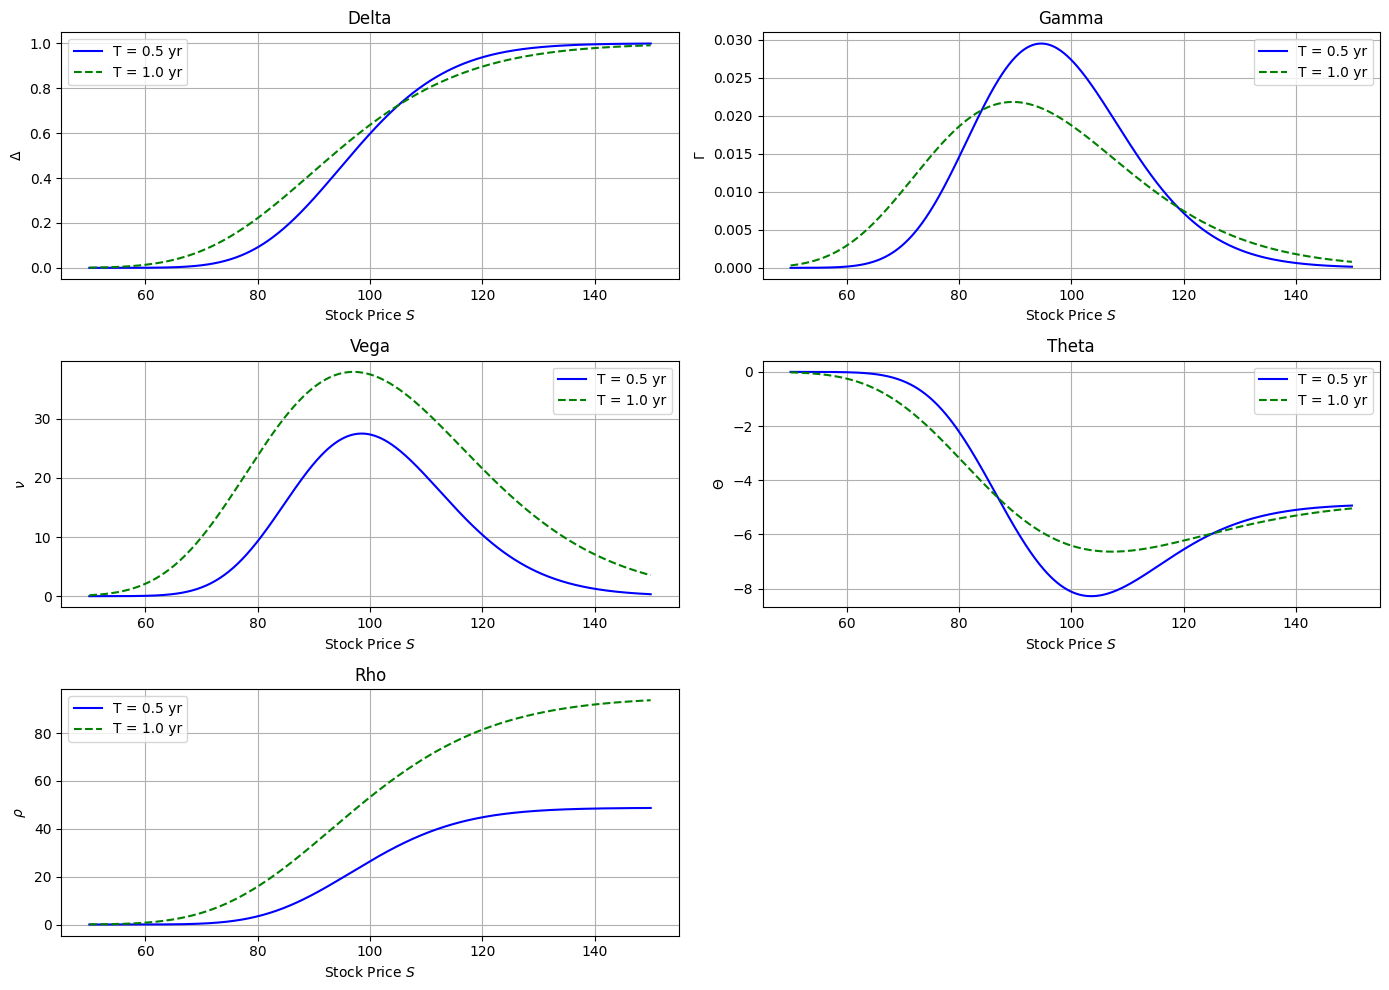

In [65]:
# Plotting All Greeks Side-by-Side
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.ravel()

def plot_compare(ax, y1, y2, title, ylabel):
    ax.plot(S, y1, label='T = 0.5 yr', color='blue')
    ax.plot(S, y2, label='T = 1.0 yr', color='green', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel("Stock Price $S$")
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

# Plot each Greek
plot_compare(axs[0], delta_0_5, delta_1, "Delta", r"$\Delta$")
plot_compare(axs[1], gamma_0_5, gamma_1, "Gamma", r"$\Gamma$")
plot_compare(axs[2], vega_0_5, vega_1, "Vega", r"$\nu$")
plot_compare(axs[3], theta_0_5, theta_1, "Theta", r"$\Theta$")
plot_compare(axs[4], rho_0_5, rho_1, "Rho", r"$\rho$")
axs[5].axis("off")

plt.tight_layout()
plt.show()
